In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class CustomImageDataGenerator(ImageDataGenerator):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

# Set the paths to your individual folders
granite_dir = 'granite1'
sandstone_dir = 'sandstone1'
limestone_dir = 'limestone1'
quartzite_dir = 'quartzite1'

# Define the input image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generator for training
train_datagen = CustomImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='.',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=[granite_dir, sandstone_dir, limestone_dir, quartzite_dir]
)

# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
steps_per_epoch = train_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_generator)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

Found 166 images belonging to 4 classes.
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3566 - loss: 4.9539
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3750 - loss: 1.1058
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7852 - loss: 0.7876
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.3271  
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8506 - loss: 0.4124
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.5893
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7956 - loss: 0.4302
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.3222
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8818 - loss: 0.3392
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0606
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9177 - loss: 0.1498
Epoch 12/20
10/10 ━━━━━━━━━━━━━

In [10]:
model.save('rock_classifier_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split


In [2]:
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your file extensions
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB (OpenCV uses BGR by default)
            img = cv2.resize(img, (224, 224))  # Resize images (adjust dimensions as needed)
            images.append(img)
            labels.append(directory)  # Use directory name as label (adjust as needed)
    return images, labels


In [4]:
granite_dir = 'granite1'
sandstone_dir = 'sandstone1'
limestone_dir = 'limestone1'
quartzite_dir = 'quartzite1'

granite_images, granite_labels = load_images(granite_dir)
sandstone_images, sandstone_labels = load_images(sandstone_dir)
limestone_images, limestone_labels = load_images(limestone_dir)
quartzite_images, quartzite_labels = load_images(quartzite_dir)


In [5]:
# Combine all data
images = np.concatenate([granite_images, sandstone_images, limestone_images, quartzite_images], axis=0)
labels = np.concatenate([granite_labels, sandstone_labels, limestone_labels, quartzite_labels], axis=0)

# Convert labels to numerical format if needed (example using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1] (optional depending on your model)
train_images = train_images / 255.0
val_images = val_images / 255.0

# Print dataset statistics
print(f"Total images: {len(images)}")
print(f"Training images: {len(train_images)}, Validation images: {len(val_images)}")


Total images: 164
Training images: 131, Validation images: 33


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape based on your image dimensions
input_shape = (224, 224, 3)  # Example size, adjust according to your image dimensions

# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust Dense layer units to match number of classes
])


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the input shape based on your image dimensions
input_shape = (224, 224, 3)  # Example size, adjust according to your image dimensions

# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust Dense layer units to match number of classes
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to see the architecture and number of parameters
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_images, val_labels)
print(f'Validation accuracy: {val_acc}')

# Save the trained model
model.save('rock_classifier_model.h5')

print("Model saved successfully.")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,680,580 (36.93 MB)

 Trainable params: 9,680,580 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2931 - loss: 1.8219 - val_accuracy: 0.3030 - val_loss: 1.3460
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3090 - loss: 1.3454 - val_accuracy: 0.3030 - val_loss: 1.2010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5534 - loss: 1.1260 - val_accuracy: 0.6061 - val_loss: 0.8744
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7361 - loss: 0.7473 - val_accuracy: 0.7273 - val_loss: 0.5403
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8161 - loss: 0.5062 - val_accuracy: 0.7273 - val_loss: 0.4934
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8534 - loss: 0.3836 - val_accuracy: 0.9091 - val_loss: 0.2997
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9156 - loss: 0.2880 - val_accuracy: 0.8182 - val_loss: 0.3473
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8782 - loss: 0.3730 - val_accuracy: 0.9394 - val_loss: 0.2067
Epoch 9/20


Validation accuracy: 0.9090909361839294
Model saved successfully.


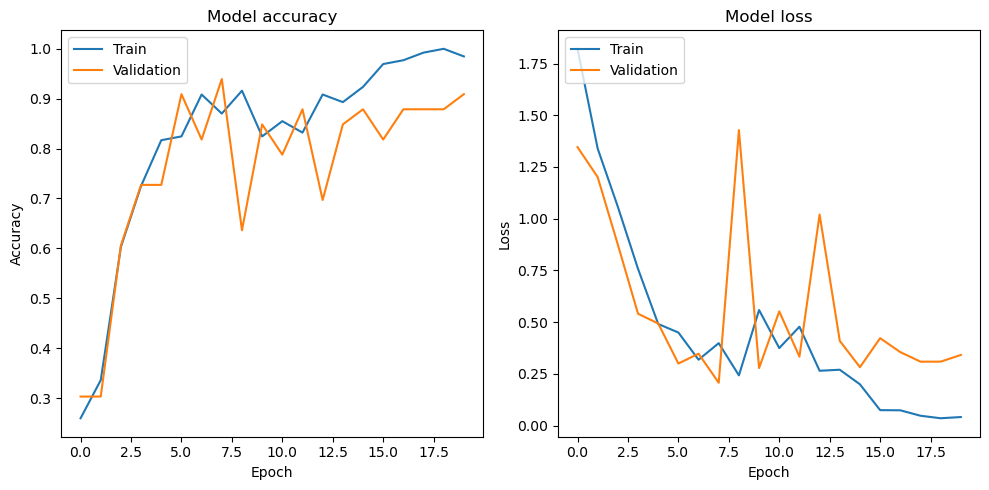

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()


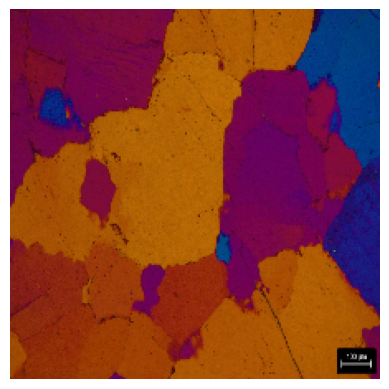

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the test image
img_path = '6.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Load image and resize to model's expected sizing
img_array = image.img_to_array(img)  # Convert PIL Image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size used during training
img_array = img_array / 255.0  # Normalize pixel values (assuming your model was trained with normalized data)

# Display the test image
plt.imshow(img)
plt.axis('off')
plt.show()


In [19]:
# Assuming `model` is your trained Keras model

# Make predictions
predictions = model.predict(img_array)

# Print the predicted class label
predicted_class = np.argmax(predictions)
print(f"Predicted class: {predicted_class}")  # This will give you the numeric label of the predicted class

# Optionally, you can decode the label if you have a label encoder
# For example, if you have used sklearn's LabelEncoder during training:
# predicted_class_label = encoder.inverse_transform([predicted_class])
# print(f"Predicted class: {predicted_class_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted class: 0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Example of predicted class
predicted_class = 0  # Replace with your actual predicted class value

# Initialize a label encoder
encoder = LabelEncoder()
encoder.classes_ = ['granite', 'sandstone', 'limestone', 'quartzite']  # Example class names

# Decode the predicted class
predicted_class_label = encoder.classes_[predicted_class]
print(f"Predicted class: {predicted_class_label}")


Predicted class: granite


In [21]:
from sklearn.metrics import classification_report

# Assuming `model` is your trained Keras model
# Assuming `val_images` and `val_labels` are your validation dataset

# Predict classes for validation set
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
class_report = classification_report(val_labels, predicted_classes)
print("Classification Report:")
print(class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         6
           2       0.90      0.90      0.90        10
           3       0.75      0.86      0.80         7

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.92      0.91      0.91        33



In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Adjust to the number of classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,562,308 (105.14 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('rock_classifier_model.h5')

# Print model summary to see the architecture and number of parameters
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,680,582 (36.93 MB)

 Trainable params: 9,680,580 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)